<a href="https://colab.research.google.com/github/abequette/CS167Fall22Code/blob/main/Day22Notes_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 22 Notes
### Convolutional Neural Network Code 
We'll get some practice using tensorflow and keras 

In [9]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


## Enable GPUs
Go to 'Edit' and then 'Notebook Settings'. In the 'Hardware Accelerator' dropdown menu, select 'GPU'. This means that Colab will run on a GPU from Google rather than a CPU which will accelerate our training.

In [11]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [12]:
import keras
import tensorflow
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [13]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# baseline model for the dogs vs cats dataset
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

In [15]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167/catdogdata/train' #2000 images
test_data_dir = '/content/drive/MyDrive/CS167/catdogdata/test'   #400 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


# Load the data
If you get a 'File not found' error here and you're sure your path is correct, make sure you unzipped the catdog.zip file. 

You may need to use a plugin if you want to unzip on Drive. Instead you can download it to your local machine, unzip it on your local machine and then upload to Drive. Uploading/upzipping on Drive may take a while (Mine took about 20 minutes). 

In [16]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [17]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
63/63 [==============================] - 289s 4s/step - loss: 0.7284 - accuracy: 0.5240 - val_loss: 0.6881 - val_accuracy: 0.5475
Epoch 2/5
63/63 [==============================] - 11s 176ms/step - loss: 0.6860 - accuracy: 0.5670 - val_loss: 0.6845 - val_accuracy: 0.6025
Epoch 3/5
63/63 [==============================] - 11s 178ms/step - loss: 0.6788 - accuracy: 0.5700 - val_loss: 0.8153 - val_accuracy: 0.5025
Epoch 4/5
63/63 [==============================] - 11s 179ms/step - loss: 0.6828 - accuracy: 0.5760 - val_loss: 0.6804 - val_accuracy: 0.5725
Epoch 5/5
63/63 [==============================] - 12s 193ms/step - loss: 0.6681 - accuracy: 0.6005 - val_loss: 0.6837 - val_accuracy: 0.5650


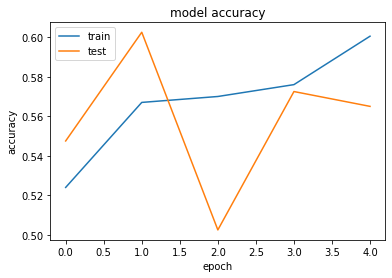

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:

#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
model2.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
63/63 [==============================] - 11s 167ms/step - loss: 0.6945 - accuracy: 0.5110 - val_loss: 0.6880 - val_accuracy: 0.5075
Epoch 2/10
63/63 [==============================] - 11s 180ms/step - loss: 0.6885 - accuracy: 0.5475 - val_loss: 0.6839 - val_accuracy: 0.5850
Epoch 3/10
63/63 [==============================] - 10s 164ms/step - loss: 0.6830 - accuracy: 0.5625 - val_loss: 0.6832 - val_accuracy: 0.5350
Epoch 4/10
63/63 [==============================] - 11s 176ms/step - loss: 0.6792 - accuracy: 0.5685 - val_loss: 0.6718 - val_accuracy: 0.5950
Epoch 5/10
63/63 [==============================] - 11s 180ms/step - loss: 0.6744 - accuracy: 0.5770 - val_loss: 0.6797 - val_accuracy: 0.5450
Epoch 6/10
63/63 [==============================] - 10s 162ms/step - loss: 0.6680 - accuracy: 0.5935 - val_loss: 0.6681 - val_accuracy: 0.6075
Epoch 7/10
63/63 [==============================] - 10s 163ms/step - loss: 0.6613 - accuracy: 0.6075 - val_loss: 0.6569 - val_accuracy: 0.6375

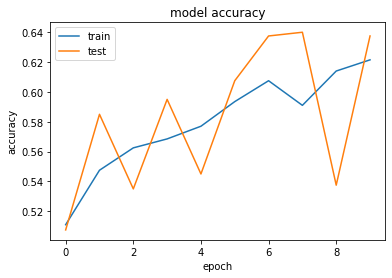

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Now, try your own image:


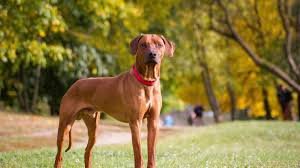

In [27]:
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/doggo.jpg'))

In [29]:
#try your own image..

from keras.utils import load_img
from keras.utils import img_to_array
img = load_img("/content/drive/MyDrive/CS167/doggo.jpg", target_size=(200, 200))
#img = load_img("cat_pic.jpeg", target_size=(200, 200))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels

img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
#convert image from [0,255] to [0,1]
img = datagen.standardize(img)

# predict the class  # 0 is cat; 1 is dog
result = model2.predict(img)
print(result)

1/1 [==============================] - 0s 18ms/step
[[0.57744414]]
